In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('accident_data.csv')
df.shape

(1048575, 34)

In [62]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               742986 non-null   object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Class                               608751 non-null   object 
 4   2nd_Road_Number                              1037772 non-null  float64
 5   Accident_Severity                            1048575 non-null  object 
 6   Carriageway_Hazards                          1048546 non-null  object 
 7   Date                                         1048575 non-null  object 
 8   Day_of_Week                                  1048575 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

""


In [52]:
df.isnull().mean()

Accident_Index                                 0.000000
1st_Road_Class                                 0.291433
1st_Road_Number                                0.000002
2nd_Road_Class                                 0.419449
2nd_Road_Number                                0.010303
Accident_Severity                              0.000000
Carriageway_Hazards                            0.000028
Date                                           0.000000
Day_of_Week                                    0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000257
Junction_Control                               0.000000
Junction_Detail                                0.000000
Latitude                                       0.000106
Light_Conditions                               0.001987
Local_Authority_(District)                     0.000000
Local_Authority_(Highway)                      0.000000
Location_Easting_OSGR                          0.000106
Location_Northing_OSGR                         0

In [67]:
df['Accident_Severity'].value_counts()

Slight     895883
Serious    138192
Fatal       14500
Name: Accident_Severity, dtype: int64

In [82]:
print(df['Date'].dtypes)

object


In [87]:
# 문자열날짜 -> 날짜형으로 변환
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].tail()

1048570   2010-02-18
1048571   2010-02-21
1048572   2010-02-23
1048573   2010-02-23
1048574   2010-02-28
Name: Date, dtype: datetime64[ns]

In [96]:
df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

In [97]:
df['accidnet_Severity'].value_counts()

KeyError: 'accidnet_Severity'

In [91]:
df_sorted = df.sort_values(by='Date', ascending=True)
df_sorted.tail()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
1005858,201042I428212,NaN,0.0,Unclassified,0.0,Slight,None,2010-12-31,Friday,2.0,...,Essex,Wet or damp,Single carriageway,None,30,11:40,Urban,Fine no high winds,2010,No
938974,201006F040694,NaN,0.0,NaN,0.0,Serious,None,2010-12-31,Friday,1.0,...,Greater Manchester,Dry,Single carriageway,None,30,21:15,Urban,Fine no high winds,2010,No
1005866,201042I429212,B,186.0,B,1335.0,Slight,None,2010-12-31,Friday,1.0,...,Essex,Wet or damp,Single carriageway,None,30,11:30,Rural,Fine no high winds,2010,No
1005849,201042I427312,B,1008.0,NaN,0.0,Slight,None,2010-12-31,Friday,2.0,...,Essex,Wet or damp,Single carriageway,None,30,13:30,Urban,Fine no high winds,2010,No
920029,201001SX21356,A,406.0,NaN,0.0,Slight,Other object on road,2010-12-31,Friday,1.0,...,Metropolitan Police,Wet or damp,Dual carriageway,None,40,20:31,Urban,Raining no high winds,2010,No


In [94]:
Motorway_df = df[df['1st_Road_Class'] == 'Motorway']
Motorway_df

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
6296,200501ID00002,Motorway,4.0,Motorway,4.0,Slight,None,2005-05-01,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,50,18:20,Urban,Fine no high winds,2005,No
6332,200501ID60040,Motorway,4.0,Motorway,4.0,Slight,None,2005-05-25,Wednesday,2.0,...,Metropolitan Police,Dry,Roundabout,None,30,08:00,Urban,Fine no high winds,2005,No
6333,200501ID60041,Motorway,25.0,NaN,0.0,Serious,None,2005-06-22,Wednesday,2.0,...,Metropolitan Police,Dry,Dual carriageway,None,40,10:45,Rural,Fine no high winds,2005,No
6338,200501ID60048,Motorway,4.0,Unclassified,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,13:30,Urban,Fine no high winds,2005,No
7374,200501JI40304,Motorway,11.0,NaN,0.0,Slight,None,2005-05-18,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,50,16:32,Rural,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046709,2.01062E+12,Motorway,4.0,NaN,0.0,Slight,None,2010-07-12,Tuesday,1.0,...,South Wales,Frost or ice,Dual carriageway,None,70,17:55,Urban,Fine no high winds,2010,No
1046713,2.01062E+12,Motorway,4.0,NaN,0.0,Serious,None,2010-12-17,Friday,1.0,...,South Wales,Frost or ice,Dual carriageway,None,70,00:35,Rural,Fine no high winds,2010,No
1046752,2.01062E+12,Motorway,4.0,NaN,0.0,Slight,None,2010-12-13,Monday,1.0,...,South Wales,Dry,Dual carriageway,None,70,08:55,Rural,Fine no high winds,2010,No
1047238,201063AC41710,Motorway,4.0,A,48.0,Slight,None,2010-11-13,Saturday,1.0,...,Dyfed-Powys,Wet or damp,Roundabout,None,70,05:57,Rural,Raining no high winds,2010,No


In [95]:
Motorway_df.isnull().sum()

Accident_Index                                     0
1st_Road_Class                                     0
1st_Road_Number                                    0
2nd_Road_Class                                 35385
2nd_Road_Number                                  116
Accident_Severity                                  0
Carriageway_Hazards                                2
Date                                               0
Day_of_Week                                        0
Did_Police_Officer_Attend_Scene_of_Accident        0
Junction_Control                                   0
Junction_Detail                                    0
Latitude                                           7
Light_Conditions                                   0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
Location_Easting_OSGR                              7
Location_Northing_OSGR                             7
Longitude                                     

In [64]:
df.describe(include=['float64'])

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities
count,1.048573e+06,1.037772e+06,1.048306e+06,1.048464e+06,1.048464e+06,1.048464e+06,1.048463e+06,1.048554e+06,1.048538e+06
mean,1.011997e+03,3.870004e+02,1.198669e+00,5.257297e+01,4.383077e+05,2.983130e+05,-1.454537e+00,9.291844e-03,6.793955e-01
std,1.832042e+03,1.316673e+03,4.062626e-01,1.424463e+00,9.479292e+04,1.581757e+05,1.391890e+00,1.267232e-01,1.749380e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,4.991443e+01,6.495000e+04,1.052000e+04,-7.516225e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+00,5.149244e+01,3.752200e+05,1.784700e+05,-2.371331e+00,0.000000e+00,0.000000e+00
50%,1.250000e+02,0.000000e+00,1.000000e+00,5.234314e+01,4.377000e+05,2.729300e+05,-1.435624e+00,0.000000e+00,0.000000e+00
75%,7.060000e+02,0.000000e+00,1.000000e+00,5.346407e+01,5.211600e+05,3.965500e+05,-2.446045e-01,0.000000e+00,0.000000e+00
max,9.999000e+03,9.999000e+03,3.000000e+00,6.075754e+01,6.555400e+05,1.208800e+06,1.762010e+00,2.000000e+00,8.000000e+00


In [66]:
df.describe(include=['int64'])

,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Year
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.359930e+00,1.835030e+00,3.943654e+01,2.007328e+03
std,8.223645e-01,7.181454e-01,1.431206e+01,1.690220e+00
min,1.000000e+00,1.000000e+00,1.000000e+01,2.005000e+03
25%,1.000000e+00,1.000000e+00,3.000000e+01,2.006000e+03
50%,1.000000e+00,2.000000e+00,3.000000e+01,2.007000e+03
75%,1.000000e+00,2.000000e+00,5.000000e+01,2.009000e+03
max,6.800000e+01,3.200000e+01,7.000000e+01,2.010000e+03


In [55]:
import missingno as msno

<Axes: >

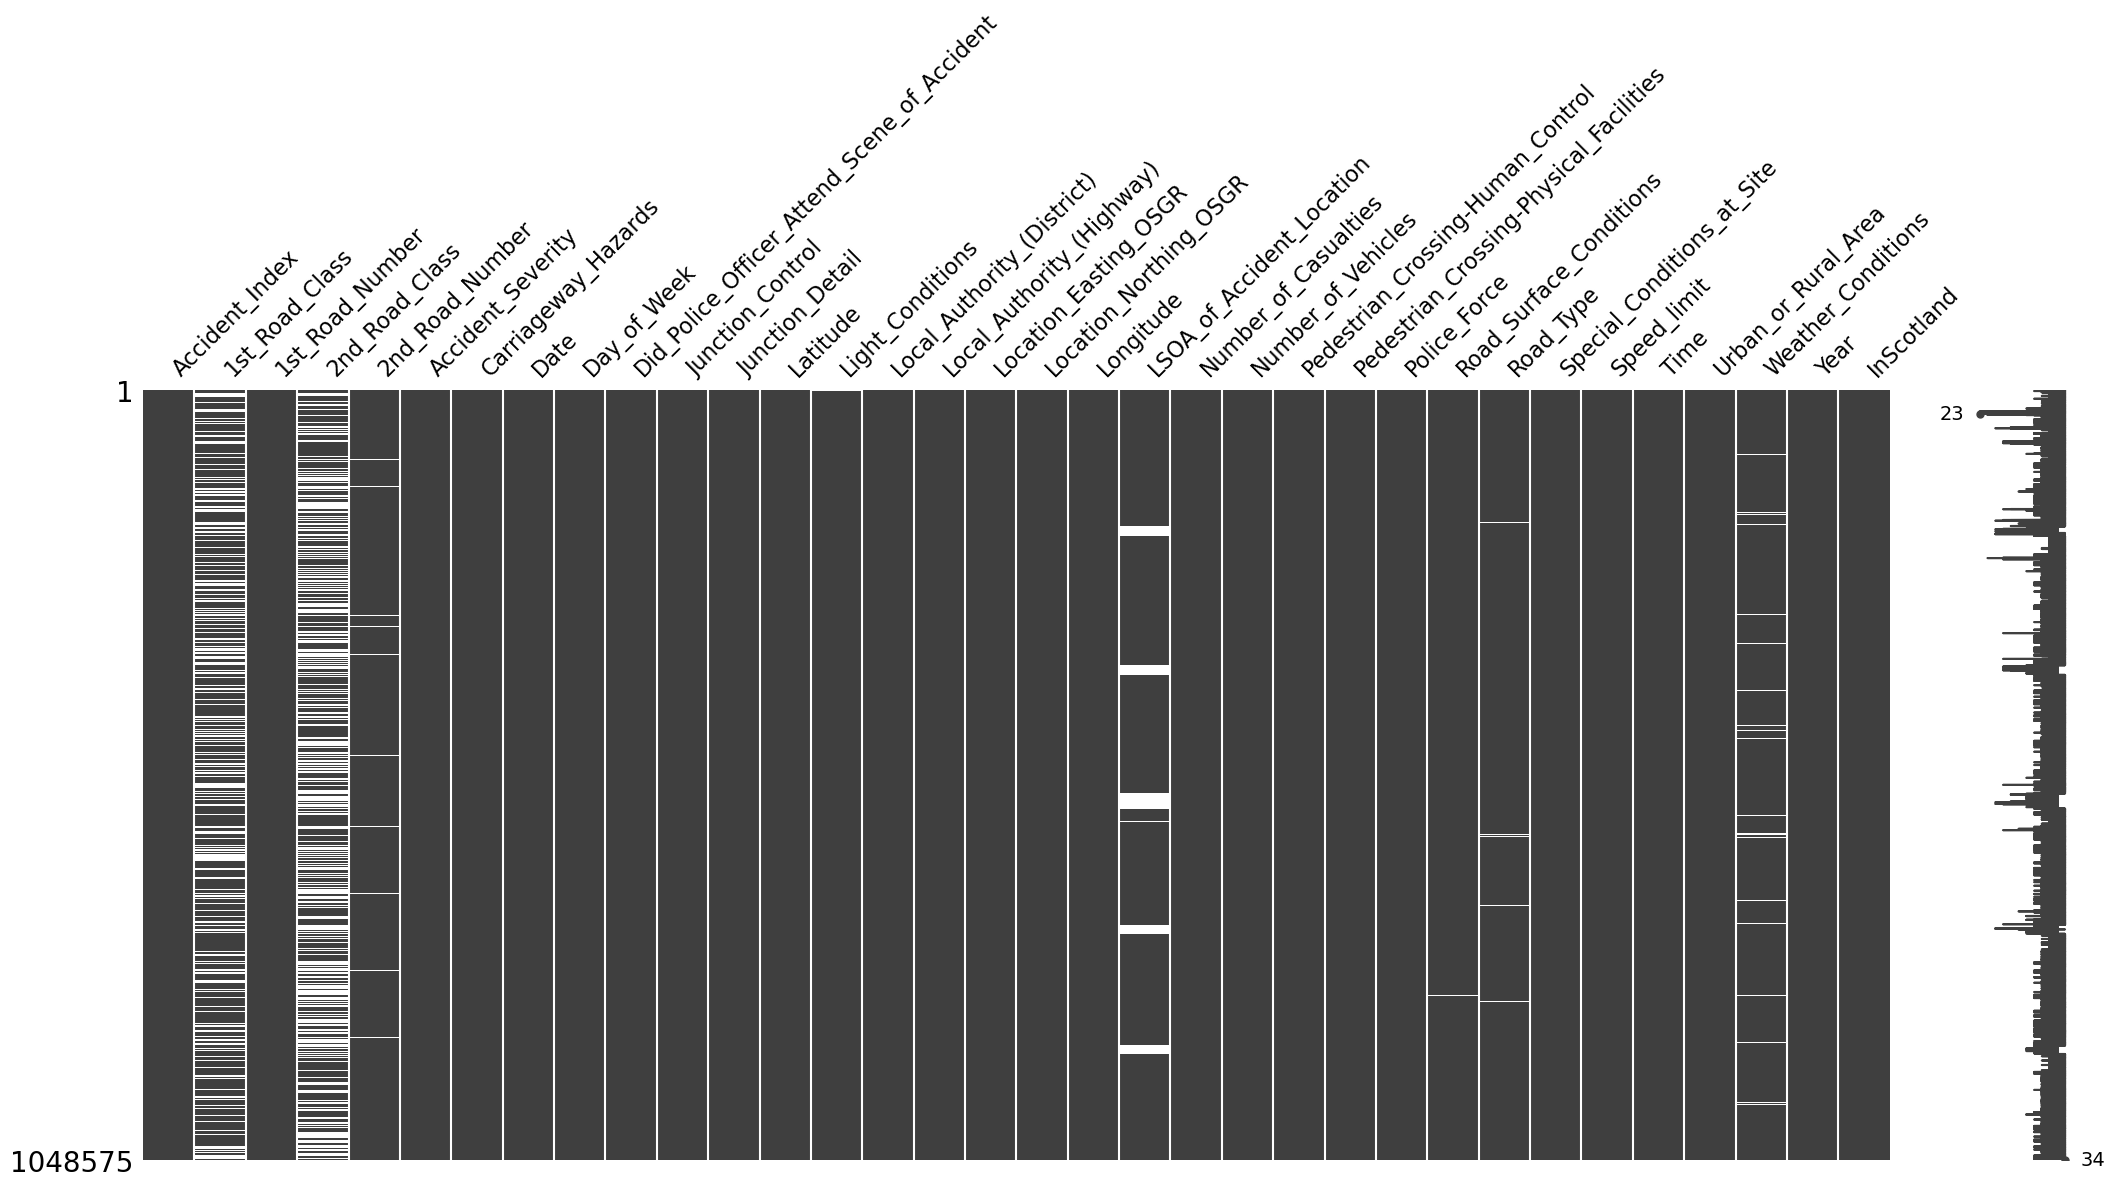

In [56]:
msno.matrix(df)

array([[<Axes: title={'center': '1st_Road_Number'}>,
        <Axes: title={'center': '2nd_Road_Number'}>,
        <Axes: title={'center': 'Did_Police_Officer_Attend_Scene_of_Accident'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Location_Easting_OSGR'}>,
        <Axes: title={'center': 'Location_Northing_OSGR'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Number_of_Casualties'}>],
       [<Axes: title={'center': 'Number_of_Vehicles'}>,
        <Axes: title={'center': 'Pedestrian_Crossing-Human_Control'}>,
        <Axes: title={'center': 'Pedestrian_Crossing-Physical_Facilities'}>,
        <Axes: title={'center': 'Speed_limit'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

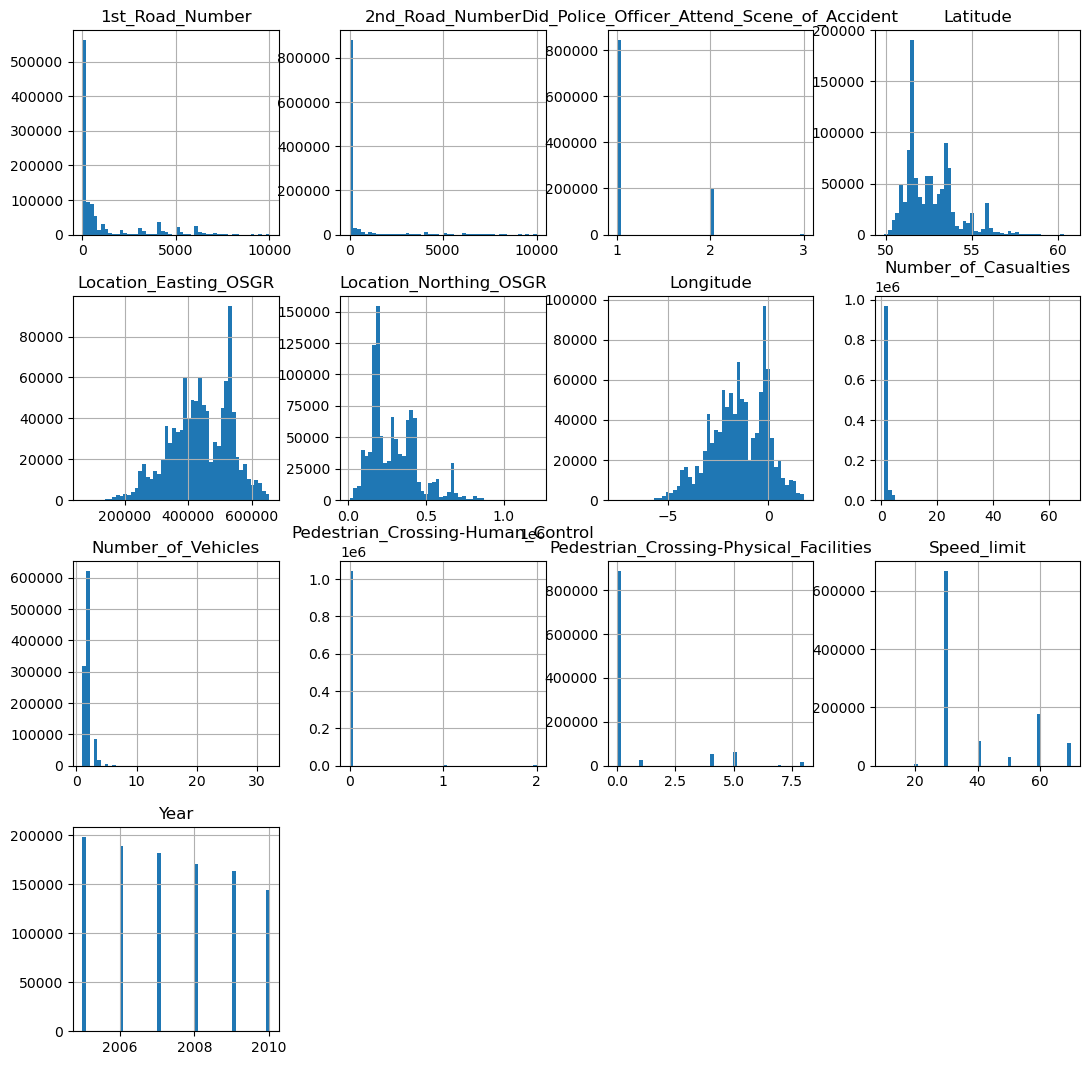

In [60]:
_ = df.hist(figsize=(13,13), bins=50)
_